In [1]:
import os
import pandas as pd
from konlpy.tag import Mecab
import re
from wordcloud import WordCloud

In [2]:
# CSV 파일 불러오기
train_data_path = "./data/train.csv"
train_data = pd.read_csv(train_data_path)
train_data.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


## Step 1. 데이터 전처리 및 토크나이징

In [3]:
# PreprocessMecab 클래스 정의
class PreprocessMecab:
    def __init__(self):
        self.mecab = Mecab()
        self.exclusion_tags = [
            'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ', 
            'JX', 'JC', 'SF', 'SP', 'SS', 'SE', 'SO', 'EP', 
            'EF', 'EC', 'ETN', 'ETM', 'XSN', 'XSV', 'XSA'
        ]
    
    def pos(self, sentence):
        return self.mecab.pos(sentence)
    
    def get_keywords(self, pos, without_tag=False):
        word_list = []
        for p in pos:
            if p[1] not in self.exclusion_tags:
                word_list.append(p if not without_tag else p[0])
        return word_list

# 전처리 함수 정의 (물음표 및 특수문자 제거)
def preprocess_conversation(conversation):
    if conversation is None or conversation.strip() == '':
        return ''
    
    # 모든 특수문자 제거 (물음표도 포함)
    conversation = re.sub(r'[^가-힣a-zA-Z0-9\s]', '', conversation)
    
    pos_tags = preprocessor.pos(conversation)  # 형태소 분석
    keywords = preprocessor.get_keywords(pos_tags, without_tag=True)  # 키워드 추출
    return ' '.join(keywords)  # 키워드를 하나의 문자열로 반환

In [4]:
# 전처리 인스턴스 생성
preprocessor = PreprocessMecab()

# 전처리 적용
train_data['processed_conversation'] = train_data['conversation'].apply(preprocess_conversation)

# 결과 출력
train_data[['conversation', 'processed_conversation']].head()

,conversation,processed_conversation
0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...,지금 너 스스로 죽여 달 애원 것 인가 아닙니다 죄송 합니다 죽 거 면 혼자 죽 우...
1,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...,길동 경찰서 입니다 9 시 40 분 마트 폭발물 설치 할 거 다 네 똑바로 들 한 ...
2,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...,너 되게 귀여운 거 알 나 작 남자 첨 봤 그만 해 니 놀리 거 재미없 지영 너 키...
3,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...,어 이 거기 예 너 말 이 너 이리 오 무슨 일 너 옷 좋 보인다 얘 돈 좀 있 봐...
4,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,저기 혹시 날 너무 뜨겁 잖아요 저희 회사 이 선크림 파 한 번 손등 발라 보 실래...


In [5]:
train_data[['conversation', 'processed_conversation']].head(15)

,conversation,processed_conversation
0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...,지금 너 스스로 죽여 달 애원 것 인가 아닙니다 죄송 합니다 죽 거 면 혼자 죽 우...
1,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...,길동 경찰서 입니다 9 시 40 분 마트 폭발물 설치 할 거 다 네 똑바로 들 한 ...
2,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...,너 되게 귀여운 거 알 나 작 남자 첨 봤 그만 해 니 놀리 거 재미없 지영 너 키...
3,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...,어 이 거기 예 너 말 이 너 이리 오 무슨 일 너 옷 좋 보인다 얘 돈 좀 있 봐...
4,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,저기 혹시 날 너무 뜨겁 잖아요 저희 회사 이 선크림 파 한 번 손등 발라 보 실래...
5,나 이틀뒤에 가나다 음식점 예약좀 해줘. 저녁7시로.\n가나다 음식점이요.?\n응....,나 이틀 뒤 가 음식점 예약 좀 해 줘 저녁 7 시 가나다 음식점 이 응 남자 친구...
6,35번 손님 아이스커피 두잔나왔습니다\n아이스커피? \n네 맛있게드세요\n저기요 아...,35 번 손님 아이스커피 두 잔 나왔 아이스커피 네 맛있 드세요 저기요 아가씨 나 ...
7,경비아저씨 내차에 경고장 붙였어요?\n내가 여기 몇년째 사는데 아직도 내차인줄 모르...,경비 아저씨 내차 경고장 붙였 내 여기 몇 년 사 아직 내차 인 줄 모르 이딴 식 ...
8,이거 할인 된다면서요\n 확인해보겠습니다\n 아까 저 시람은 할인 해주던데\n 네 ...,이거 할인 된다면서요 확인 해 보 아까 저 시 람 할인 해 주 네 저 손 고객 이 ...
9,자네 세금계산서 보내준 거 메일이랑 수치가 다르던데?\n그게.\n얼마나 해먹었어? ...,자네 세금 계산서 보내 준 거 메일 수치 다르 그게 얼마나 해 먹 괜찮 다른 업체 ...


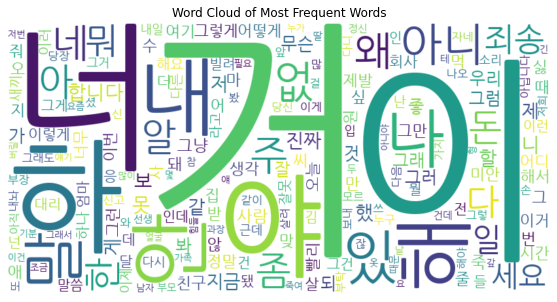

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 모든 전처리된 대화 데이터를 하나의 문자열로 결합
all_conversations = ' '.join(train_data['processed_conversation'])

# 단어를 분리하고 빈도 계산
words = all_conversations.split()
word_counts = Counter(words)

# WordCloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate_from_frequencies(word_counts)

# WordCloud 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.title('Word Cloud of Most Frequent Words')
plt.show()

In [7]:
# 불용어 리스트 로드
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords = file.read().splitlines()  # 줄 단위로 읽어 리스트로 저장
    return stopwords

# 불용어 파일 경로
stopwords = load_stopwords('./stopwords-ko.txt')

# DataFrame의 processed_conversation에서 불용어 제거
def remove_stopwords_from_conversations(conversation):
    # 키워드를 공백으로 분리
    words = conversation.split()
    # 불용어가 아닌 단어만 필터링
    filtered_words = [word for word in words if word not in stopwords]
    return ' '.join(filtered_words)  # 필터링된 단어들을 공백으로 연결

# processed_conversation 열에서 불용어 제거 적용
train_data['processed_conversation'] = train_data['processed_conversation'].apply(remove_stopwords_from_conversations)

# 결과 확인
print(train_data[['processed_conversation']].head())


                              processed_conversation
0  지금 스스로 죽여 달 애원 인가 아닙니다 죄송 합니다 죽 거 면 죽 사건 휘말리 해...
1  길동 경찰서 입니다 9 시 40 분 마트 폭발물 설치 할 거 다 똑바로 한 번 더 ...
2  되게 귀여운 거 알 작 남자 첨 봤 그만 해 니 놀리 거 재미없 지영 키 160 재...
3  거기 말 이리 옷 좋 보인다 얘 돈 있 돈 없 뒤져서 나오 넌 죽 오늘 피시방 콜 ...
4  날 너무 뜨겁 잖아요 회사 선크림 파 한 번 손등 발라 보 실래요 진짜 안 선크림 ...


In [8]:
train_data[['conversation', 'processed_conversation']].head(15)

,conversation,processed_conversation
0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...,지금 스스로 죽여 달 애원 인가 아닙니다 죄송 합니다 죽 거 면 죽 사건 휘말리 해...
1,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...,길동 경찰서 입니다 9 시 40 분 마트 폭발물 설치 할 거 다 똑바로 한 번 더 ...
2,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...,되게 귀여운 거 알 작 남자 첨 봤 그만 해 니 놀리 거 재미없 지영 키 160 재...
3,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...,거기 말 이리 옷 좋 보인다 얘 돈 있 돈 없 뒤져서 나오 넌 죽 오늘 피시방 콜 ...
4,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,날 너무 뜨겁 잖아요 회사 선크림 파 한 번 손등 발라 보 실래요 진짜 안 선크림 ...
5,나 이틀뒤에 가나다 음식점 예약좀 해줘. 저녁7시로.\n가나다 음식점이요.?\n응....,이틀 뒤 음식점 예약 해 줘 저녁 7 시 가나다 음식점 남자 친구 부모 인사 드리 ...
6,35번 손님 아이스커피 두잔나왔습니다\n아이스커피? \n네 맛있게드세요\n저기요 아...,35 번 손님 아이스커피 두 잔 나왔 아이스커피 맛있 드세요 저기요 아가씨 아스 시...
7,경비아저씨 내차에 경고장 붙였어요?\n내가 여기 몇년째 사는데 아직도 내차인줄 모르...,경비 아저씨 내차 경고장 붙였 내 아직 내차 인 줄 모르 이딴 식 경고장 붙여 입주...
8,이거 할인 된다면서요\n 확인해보겠습니다\n 아까 저 시람은 할인 해주던데\n 네 ...,이거 할인 된다면서요 확인 해 보 아까 시 람 할인 해 주 손 고객 십니다 고객 차...
9,자네 세금계산서 보내준 거 메일이랑 수치가 다르던데?\n그게.\n얼마나 해먹었어? ...,자네 세금 계산서 보내 준 거 메일 수치 다르 그게 해 먹 괜찮 업체 다 회사 비밀...


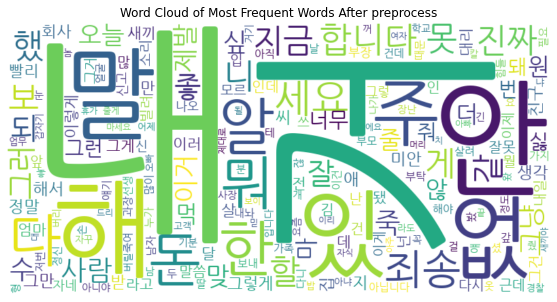

In [9]:
# 모든 전처리된 대화 데이터를 하나의 문자열로 결합
all_conversations = ' '.join(train_data['processed_conversation'])

# 단어를 분리하고 빈도 계산
words = all_conversations.split()
word_counts = Counter(words)

# WordCloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate_from_frequencies(word_counts)

# WordCloud 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.title('Word Cloud of Most Frequent Words After preprocess')
plt.show()

Max word length: 220
Mean word length: 56.87
Min word length: 8


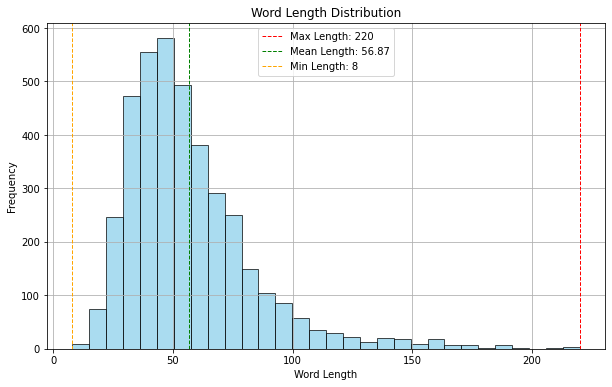

In [10]:
# Function to calculate word lengths
def calculate_word_lengths(conversations):
    lengths = [len(conversation.split()) for conversation in conversations]
    return lengths

# Calculate word lengths from the processed_conversation column
word_lengths = calculate_word_lengths(train_data['processed_conversation'])

# Calculate max, mean, and min word lengths
max_length = max(word_lengths)
mean_length = sum(word_lengths) / len(word_lengths)
min_length = min(word_lengths)

# Print results
print(f"Max word length: {max_length}")
print(f"Mean word length: {mean_length:.2f}")
print(f"Min word length: {min_length}")

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(word_lengths, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(max_length, color='red', linestyle='dashed', linewidth=1, label=f'Max Length: {max_length}')
plt.axvline(mean_length, color='green', linestyle='dashed', linewidth=1, label=f'Mean Length: {mean_length:.2f}')
plt.axvline(min_length, color='orange', linestyle='dashed', linewidth=1, label=f'Min Length: {min_length}')
plt.title('Word Length Distribution')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()


## 대략 Max_length를 135로 지정해도 괜찮을 듯?

---
## Max_len 을 지정하고 그 이하의 데이터가 몇 %에 해당하는지 확인

In [15]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [16]:
max_len = 135
below_threshold_len(max_len, train_data['processed_conversation'])

전체 샘플 중 길이가 135 이하인 샘플의 비율: 0.9754430379746836


---
### 1. 데이터 준비

* processed_conversation 열을 BERT 형식으로 변환하고, [CLS], [SEP] 토큰을 추가한 후 패딩 작업을 수행해야 합니다.
* 이 과정은 이미 Mecab으로 토크나이징된 데이터를 KoBERT에 맞게 변환하는 코드를 사용하면 됩니다.

### 2. 모델 정의 및 학습 설정

* KoBERT 모델을 불러오고, 분류 작업에 필요한 출력층을 추가합니다.
* 학습을 위한 손실 함수, 옵티마이저, 평가 메트릭을 설정합니다.

### 3. 모델 학습 및 평가

* 학습 데이터를 train, validation 세트로 나눈 후 학습을 진행합니다.
* 학습 중 검증 세트를 이용해 평가를 수행하고, 필요한 경우 Early Stopping을 적용합니다.

In [25]:
from kobert_transformers import get_tokenizer
import torch

# KoBERT 전용 토크나이저 불러오기
tokenizer = get_tokenizer()

# processed_conversation 열을 BERT 입력 형식으로 변환
def prepare_inputs(conversations, max_length=135):
    input_ids = []
    attention_masks = []
    
    for tokens in conversations:
        # Mecab으로 이미 토크나이징된 데이터를 리스트 형태로 처리
        if isinstance(tokens, str):
            tokens = tokens.split()  # 문자열을 공백 기준으로 나눠 리스트로 변환
            
        # [CLS], [SEP] 토큰을 리스트로 추가
        tokens = ['[CLS]'] + tokens + ['[SEP]']
        encoded = tokenizer.convert_tokens_to_ids(tokens)
        
        # 시퀀스 길이 제한 (max_length로 자르기)
        if len(encoded) > max_length:
            encoded = encoded[:max_length]
        
        # 패딩 추가 (최대 길이에 맞추기)
        padding_length = max_length - len(encoded)
        input_ids.append(encoded + [0] * padding_length)  # [0] 패딩 토큰
        attention_masks.append([1] * len(encoded) + [0] * padding_length)  # 실제 토큰: 1, 패딩 토큰: 0
    
    return torch.tensor(input_ids), torch.tensor(attention_masks)

# 실제 데이터에 적용
input_ids, attention_masks = prepare_inputs(train_data['processed_conversation'])


In [27]:
from transformers import AdamW
from kobert_transformers import get_kobert_model
from torch import nn
from sklearn.metrics import f1_score
import torch

# KoBERT 모델 로드 (사전 학습된 부분만)
kobert = get_kobert_model()

# KoBERT를 기반으로 분류를 위한 출력층 추가
class KoBERTClassifier(nn.Module):
    def __init__(self, kobert, num_labels=4):
        super(KoBERTClassifier, self).__init__()
        self.kobert = kobert
        self.classifier = nn.Linear(self.kobert.config.hidden_size, num_labels)  # 분류 출력층 추가
    
    def forward(self, input_ids, attention_mask=None, labels=None):
        # KoBERT 모델의 출력을 받아 분류 헤드에 연결
        outputs = self.kobert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs[1]  # [CLS] 토큰에 해당하는 출력
        logits = self.classifier(pooled_output)
        
        # 손실 계산이 필요한 경우 (학습 중)
        loss = None
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return (loss, logits) if loss is not None else logits

# 분류 모델 생성
model = KoBERTClassifier(kobert, num_labels=4)

# 옵티마이저 설정
optimizer = AdamW(model.parameters(), lr=5e-5)

# 학습 및 평가 함수 정의
def train_and_evaluate(model, train_dataloader, val_dataloader, epochs=4):
    for epoch in range(epochs):
        # Training step
        model.train()
        total_loss = 0
        train_preds, train_labels = [], []
        
        for step, batch in enumerate(train_dataloader):
            b_input_ids, b_input_mask, b_labels = batch
            
            optimizer.zero_grad()
            outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask, labels=b_labels)
            
            loss = outputs[0]
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            
            # Logits 예측 값 저장
            logits = outputs[1].detach().cpu().numpy()
            predictions = torch.argmax(torch.tensor(logits), dim=-1).cpu().numpy()
            
            # 실제 레이블 저장
            train_preds.extend(predictions)
            train_labels.extend(b_labels.cpu().numpy())
        
        # Train F1-score 계산
        train_f1 = f1_score(train_labels, train_preds, average='weighted')
        print(f"Epoch {epoch + 1}, Loss: {total_loss/len(train_dataloader)}, Train F1-score: {train_f1:.4f}")
        
        # Validation step
        model.eval()
        val_preds, val_labels = [], []
        
        with torch.no_grad():
            for batch in val_dataloader:
                b_input_ids, b_input_mask, b_labels = batch
                outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask)
                logits = outputs
                
                predictions = torch.argmax(logits, dim=-1).cpu().numpy()
                val_preds.extend(predictions)
                val_labels.extend(b_labels.cpu().numpy())
        
        # Validation F1-score 계산
        val_f1 = f1_score(val_labels, val_preds, average='weighted')
        print(f"Epoch {epoch + 1}, Validation F1-score: {val_f1:.4f}")

Downloading:   0%|          | 0.00/426 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352M [00:00<?, ?B/s]

In [31]:
from sklearn.preprocessing import LabelEncoder

# 'class' 열을 숫자로 인코딩
label_encoder = LabelEncoder()
train_data['encoded_class'] = label_encoder.fit_transform(train_data['class'])

In [32]:
from sklearn.model_selection import train_test_split

# 데이터 나누기 (80% train, 10% validation, 10% test)
train_inputs, temp_inputs, train_labels, temp_labels = train_test_split(input_ids, train_data['encoded_class'], test_size=0.2, random_state=42)
val_inputs, test_inputs, val_labels, test_labels = train_test_split(temp_inputs, temp_labels, test_size=0.5, random_state=42)

train_masks, temp_masks = train_test_split(attention_masks, test_size=0.2, random_state=42)
val_masks, test_masks = train_test_split(temp_masks, test_size=0.5, random_state=42)


In [35]:
import torch

# Train 데이터 로더
train_data = TensorDataset(train_inputs, train_masks, torch.tensor(train_labels.values))  # .values 추가
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=16)

# Validation 데이터 로더
val_data = TensorDataset(val_inputs, val_masks, torch.tensor(val_labels.values))  # .values 추가
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=16)

# Test 데이터 로더
test_data = TensorDataset(test_inputs, test_masks, torch.tensor(test_labels.values))  # .values 추가
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=16)


In [36]:
# 학습 및 평가 함수 정의
train_and_evaluate(model, train_dataloader, val_dataloader, epochs=4)

Epoch 1, Loss: 1.3971866393330121, Train F1-score: 0.2225
Epoch 1, Validation F1-score: 0.1023
Epoch 2, Loss: 1.3913697148814346, Train F1-score: 0.2220
Epoch 2, Validation F1-score: 0.0795
Epoch 3, Loss: 1.3890775701012275, Train F1-score: 0.2475
Epoch 3, Validation F1-score: 0.1023
Epoch 4, Loss: 1.3936060396107761, Train F1-score: 0.2162
Epoch 4, Validation F1-score: 0.0880


In [37]:
import numpy as np

# '일반 대화'를 추가 분류하는 함수
def classify_with_general_conversation(model, test_dataloader, threshold=0.6):
    model.eval()
    test_preds, test_labels = [], []
    
    with torch.no_grad():
        for batch in test_dataloader:
            b_input_ids, b_input_mask, b_labels = batch
            outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask)
            logits = outputs.detach().cpu().numpy()
            probabilities = torch.softmax(torch.tensor(logits), dim=-1).numpy()
            
            # 각 클래스에 대한 최대 확률
            max_probs = np.max(probabilities, axis=1)
            predictions = np.argmax(probabilities, axis=1)
            
            # 최대 확률이 threshold 이하인 경우 '일반 대화'로 분류 (가정: '일반 대화' 레이블이 4)
            general_conversation_label = 4
            predictions[max_probs < threshold] = general_conversation_label
            
            test_preds.extend(predictions)
            test_labels.extend(b_labels.cpu().numpy())
    
    return test_preds, test_labels


In [38]:
# 테스트 데이터에서 '일반 대화'를 포함한 분류 실행
test_preds, test_labels = classify_with_general_conversation(model, test_dataloader, threshold=0.6)

# Test F1-score 계산
test_f1 = f1_score(test_labels, test_preds, average='weighted')
print(f"Test F1-score (with general conversation): {test_f1:.4f}")

Test F1-score (with general conversation): 0.0000


/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44040 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_

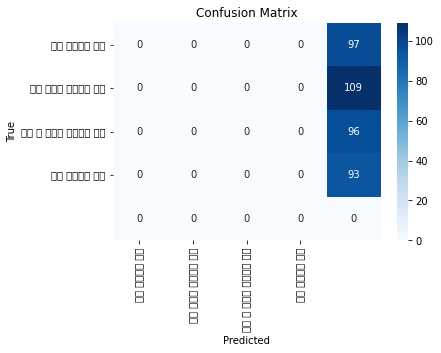

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 혼동 행렬 출력
def plot_confusion_matrix(test_labels, test_preds, label_encoder):
    cm = confusion_matrix(test_labels, test_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_ + ['일반 대화'], yticklabels=label_encoder.classes_ + ['일반 대화'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# 혼동 행렬 시각화
plot_confusion_matrix(test_labels, test_preds, label_encoder)


In [40]:
# 모델 저장
torch.save(model.state_dict(), 'kobert_model_with_general_conversation.bin')

# 모델 로드
model.load_state_dict(torch.load('kobert_model_with_general_conversation.bin'))
model.eval()  # 평가 모드로 전환


KoBERTClassifier(
  (kobert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(8002, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=